In [28]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import imageio.v3 as iio

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

import tensorflow as tf
from tensorflow import keras

%matplotlib inline
tf.random.set_seed(42)
np.random.seed(42)

# Import Dataset

In [2]:
num_classes = 10
img_rows, img_cols = 28, 28
num_channels = 1

input_shape = (img_rows, img_cols, num_channels)

(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

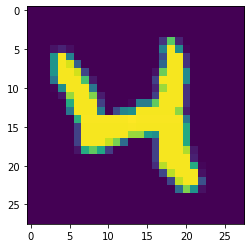

In [19]:
plt.imshow(x_train[np.where(y_train==4)][2])

# Create the models

## Model Raw

In [6]:
model = tf.keras.models.Sequential()

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = input_shape))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.build()

model.summary()

early_stop = keras.callbacks.EarlyStopping(patience=1, restore_best_weights=True)

model.fit(x_train, y_train, epochs=25, verbose=1, validation_data=(x_test, y_test), callbacks=early_stop)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2566 - accuracy: 0.9261 - val_loss: 0.1346 - val_accuracy: 0.9604
Epoch 2/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1143 - accuracy: 0.9659 - val_loss: 0.1027 - val_accuracy: 0.9661
Epoch 3/25
1875/1875 [==

## Model 1

In [10]:
model_1 = tf.keras.models.Sequential()

model_1.add(tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape = input_shape))
model_1.add(tf.keras.layers.MaxPool2D(2,2))

model_1.add(tf.keras.layers.Flatten())

model_1.add(tf.keras.layers.Dense(128, activation='relu'))
model_1.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_1.build()

model_1.summary()

early_stop = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

model_1.fit(x_train, y_train, epochs=25, verbose=1, validation_data=(x_test, y_test), callbacks=early_stop)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 2704)              0         
                                                                 
 dense_10 (Dense)            (None, 128)               346240    
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 347,690
Trainable params: 347,690
Non-trainable params: 0
________________________________________________

## Model 2

In [11]:
model_2 = tf.keras.models.Sequential()

model_2.add(tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape = input_shape))
model_2.add(tf.keras.layers.MaxPool2D(2,2))

model_2.add(tf.keras.layers.Conv2D(64,(3,3), activation='relu', input_shape = input_shape))
model_2.add(tf.keras.layers.MaxPool2D(2,2))

model_2.add(tf.keras.layers.Flatten())

model_2.add(tf.keras.layers.Dense(128, activation='relu'))
model_2.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_2.build()

model_2.summary()

early_stop = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

model_2.fit(x_train, y_train, epochs=25, verbose=1, validation_data=(x_test, y_test), callbacks=early_stop)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        9280      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 1600)              0         
                                                                 
 dense_12 (Dense)            (None, 128)              

## Model 3

In [12]:
model_3 = tf.keras.models.Sequential()

model_3.add(tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape = input_shape))
model_3.add(tf.keras.layers.MaxPool2D(2,2))

model_3.add(tf.keras.layers.Conv2D(64,(3,3), activation='relu', input_shape = input_shape))
model_3.add(tf.keras.layers.MaxPool2D(2,2))

model_3.add(tf.keras.layers.Conv2D(128,(3,3), activation='relu', input_shape = input_shape))
model_3.add(tf.keras.layers.MaxPool2D(2,2))

model_3.add(tf.keras.layers.Flatten())

model_3.add(tf.keras.layers.Dense(128, activation='relu'))
model_3.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_3.build()

model_3.summary()

early_stop = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

model_3.fit(x_train, y_train, epochs=25, verbose=1, validation_data=(x_test, y_test), callbacks=early_stop)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        9280      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 1, 1, 128)      

## Model 4

In [22]:
model_4 = tf.keras.models.Sequential()

model_4.add(tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape = input_shape))
model_4.add(tf.keras.layers.MaxPool2D(2,2))

model_4.add(tf.keras.layers.Conv2D(64,(3,3), activation='relu', input_shape = input_shape))
model_4.add(tf.keras.layers.MaxPool2D(2,2))

model_4.add(tf.keras.layers.Flatten())

model_4.add(tf.keras.layers.Dense(256, activation='relu'))
model_4.add(tf.keras.layers.Dense(128, activation='relu'))

model_4.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model_4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_4.build()

model_4.summary()

early_stop = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

model_4.fit(x_train, y_train, epochs=150, verbose=1, validation_data=(x_test, y_test), callbacks=early_stop)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        9280      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dense_12 (Dense)            (None, 256)              

In [24]:
model_4.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0272 - accuracy: 0.9916


[0.027213141322135925, 0.991599977016449]

## Model 5

In [14]:
model_5 = tf.keras.models.Sequential()

model_5.add(tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape = input_shape))
model_5.add(tf.keras.layers.MaxPool2D(2,2))

model_5.add(tf.keras.layers.Conv2D(64,(3,3), activation='relu', input_shape = input_shape))
model_5.add(tf.keras.layers.MaxPool2D(2,2))

model_5.add(tf.keras.layers.Flatten())

model_5.add(tf.keras.layers.Dense(256, activation='relu'))
model_5.add(tf.keras.layers.Dense(128, activation='relu'))
model_5.add(tf.keras.layers.Dense(64, activation='relu'))

model_5.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model_5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_5.build()

model_5.summary()

early_stop = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

model_5.fit(x_train, y_train, epochs=25, verbose=1, validation_data=(x_test, y_test), callbacks=early_stop)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        9280      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 1600)              0         
                                                                 
 dense_19 (Dense)            (None, 256)             

## Model 6

In [16]:
model_6 = tf.keras.models.Sequential()

model_6.add(tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape = input_shape))
model_6.add(tf.keras.layers.MaxPool2D(2,2))

model_6.add(tf.keras.layers.Conv2D(64,(3,3), activation='relu', input_shape = input_shape))
model_6.add(tf.keras.layers.MaxPool2D(2,2))

model_6.add(tf.keras.layers.Flatten())

model_6.add(tf.keras.layers.Dense(512, activation='relu'))
model_6.add(tf.keras.layers.Dense(256, activation='relu'))
model_6.add(tf.keras.layers.Dense(128, activation='relu'))

model_6.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model_6.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_6.build()

model_6.summary()

early_stop = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

model_6.fit(x_train, y_train, epochs=25, verbose=1, validation_data=(x_test, y_test), callbacks=early_stop)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 64)        9280      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 1600)              0         
                                                                 
 dense_26 (Dense)            (None, 512)             

# Model Increse

In [23]:
model_4_with_dropout = tf.keras.models.Sequential()

model_4_with_dropout.add(tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape = input_shape))
model_4_with_dropout.add(tf.keras.layers.MaxPool2D(2,2))

model_4_with_dropout.add(tf.keras.layers.Conv2D(64,(3,3), activation='relu', input_shape = input_shape))
model_4_with_dropout.add(tf.keras.layers.MaxPool2D(2,2))

model_4_with_dropout.add(tf.keras.layers.Flatten())

model_4_with_dropout.add(tf.keras.layers.Dense(256, activation='relu'))
model_4_with_dropout.add(tf.keras.layers.Dropout(0.5))
model_4_with_dropout.add(tf.keras.layers.Dense(128, activation='relu'))

model_4_with_dropout.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model_4_with_dropout.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_4_with_dropout.build()

model_4_with_dropout.summary()

early_stop = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

model_4_with_dropout.fit(x_train, y_train, epochs=150, verbose=1, validation_data=(x_test, y_test), callbacks=early_stop)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        9280      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 1600)              0         
                                                                 
 dense_15 (Dense)            (None, 256)              

In [25]:
model_4_with_dropout.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0230 - accuracy: 0.9918


[0.02302253246307373, 0.9918000102043152]

In [30]:
model_4_with_dropout_2 = tf.keras.models.Sequential()

model_4_with_dropout_2.add(tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape = input_shape))
model_4_with_dropout_2.add(tf.keras.layers.MaxPool2D(2,2))

model_4_with_dropout_2.add(tf.keras.layers.Conv2D(64,(3,3), activation='relu', input_shape = input_shape))
model_4_with_dropout_2.add(tf.keras.layers.MaxPool2D(2,2))

model_4_with_dropout_2.add(tf.keras.layers.Flatten())

model_4_with_dropout_2.add(tf.keras.layers.Dense(256, activation='relu'))
model_4_with_dropout_2.add(tf.keras.layers.Dropout(0.5))
model_4_with_dropout_2.add(tf.keras.layers.Dense(128, activation='relu'))

model_4_with_dropout_2.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model_4_with_dropout_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_4_with_dropout_2.build()

model_4_with_dropout_2.summary()

early_stop = keras.callbacks.EarlyStopping(patience=3, monitor='val_accuracy',restore_best_weights=True)

model_4_with_dropout_2.fit(x_train, y_train, epochs=150, verbose=1, validation_data=(x_test, y_test), callbacks=early_stop)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 11, 11, 64)        9280      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 1600)              0         
                                                                 
 dense_24 (Dense)            (None, 256)              

Epoch 7/150  
37s 20ms/step - loss: 0.0251 - accuracy: 0.9921 - val_loss: 0.0213 - val_accuracy: 0.9939

In [31]:
model_4_with_dropout_2.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0213 - accuracy: 0.9939


[0.021317657083272934, 0.9939000010490417]

# Predict

4
313/313 [==============================] - 1s 4ms/step
4


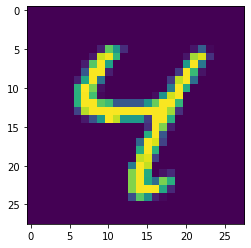

In [42]:
num_image = 6

plt.imshow(x_test[num_image])
print(y_test[num_image])

predict = model_4_with_dropout_2.predict(x_test)[num_image].round()

print(np.where(predict == 1)[0][0])

In [61]:
image_predict = np.expand_dims(x_test[num_image], axis=0)

predicted_probabilities = model_4_with_dropout_2.predict(image_predict)

predicted_labels = np.argmax(predicted_probabilities, axis=1)[0]

predicted_labels

1/1 [==============================] - 0s 57ms/step


4

# Export

In [62]:
model_4_with_dropout_2.save(r'C:\Users\iurig\OneDrive\Estudo ML\Desafio 3\model_mnist.h5')